In [70]:
#Importar librerías y módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Cargar datos
df = pd.read_csv("Cleaned-Data.csv")

In [3]:
#Previsualización de los datos
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
#Información del dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

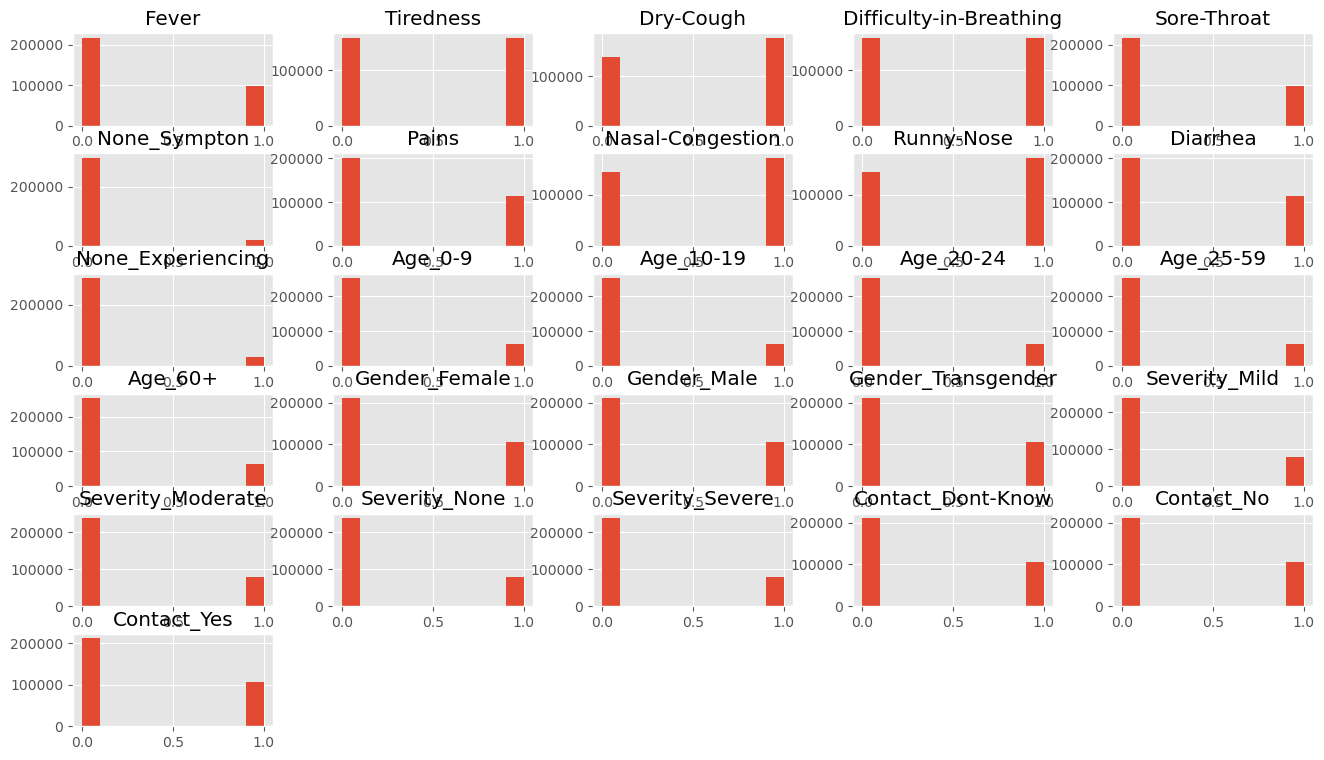

In [5]:
df.hist()
plt.show()

In [6]:
print(df.groupby('Severity_Mild').size())

Severity_Mild
0    237600
1     79200
dtype: int64


In [7]:
print(df.groupby('Severity_Moderate').size())

Severity_Moderate
0    237600
1     79200
dtype: int64


In [8]:
print(df.groupby('Severity_None').size())

Severity_None
0    237600
1     79200
dtype: int64


In [9]:
print(df.groupby('Severity_Severe').size())

Severity_Severe
0    237600
1     79200
dtype: int64


In [26]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender').columns
contact_columns = df.filter(like='Contact_').columns

In [27]:
Severidad_por_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severidad_por_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severidad_por_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

In [29]:
Severidad_por_age

,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+
Severity_Severe,,,,,
0,47520,47520,47520,47520,47520
1,15840,15840,15840,15840,15840


In [30]:
Severidad_por_gender

,Gender_Female,Gender_Male,Gender_Transgender
Severity_Severe,,,
0,79200,79200,79200
1,26400,26400,26400


In [31]:
Severidad_por_contact

,Contact_Dont-Know,Contact_No,Contact_Yes
Severity_Severe,,,
0,79200,79200,79200
1,26400,26400,26400


In [71]:
# Matrix de correlación
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

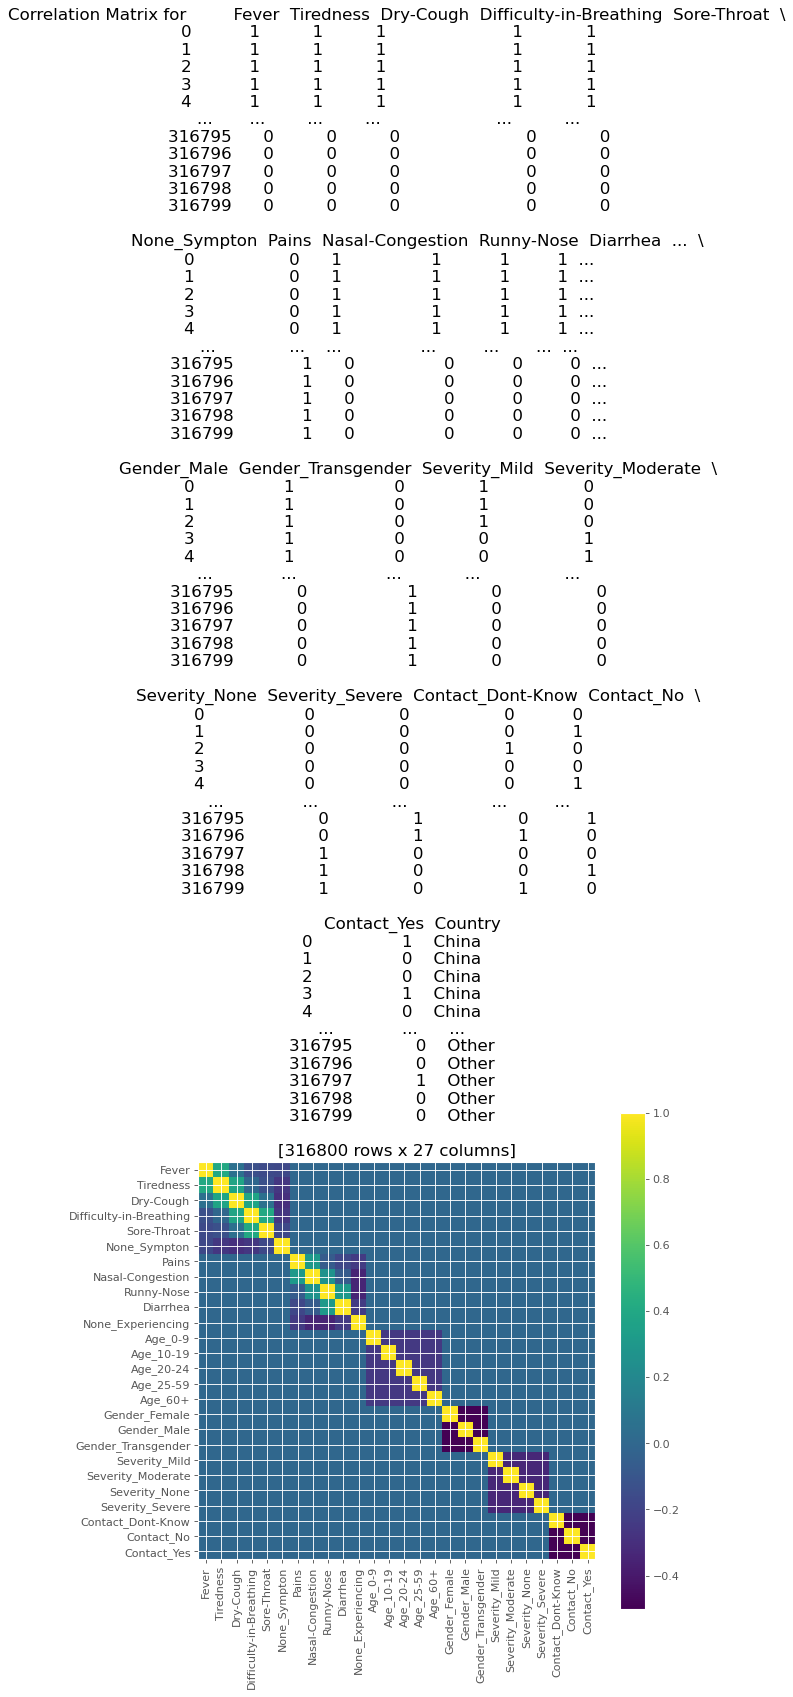

In [72]:
plotCorrelationMatrix(df, 8)

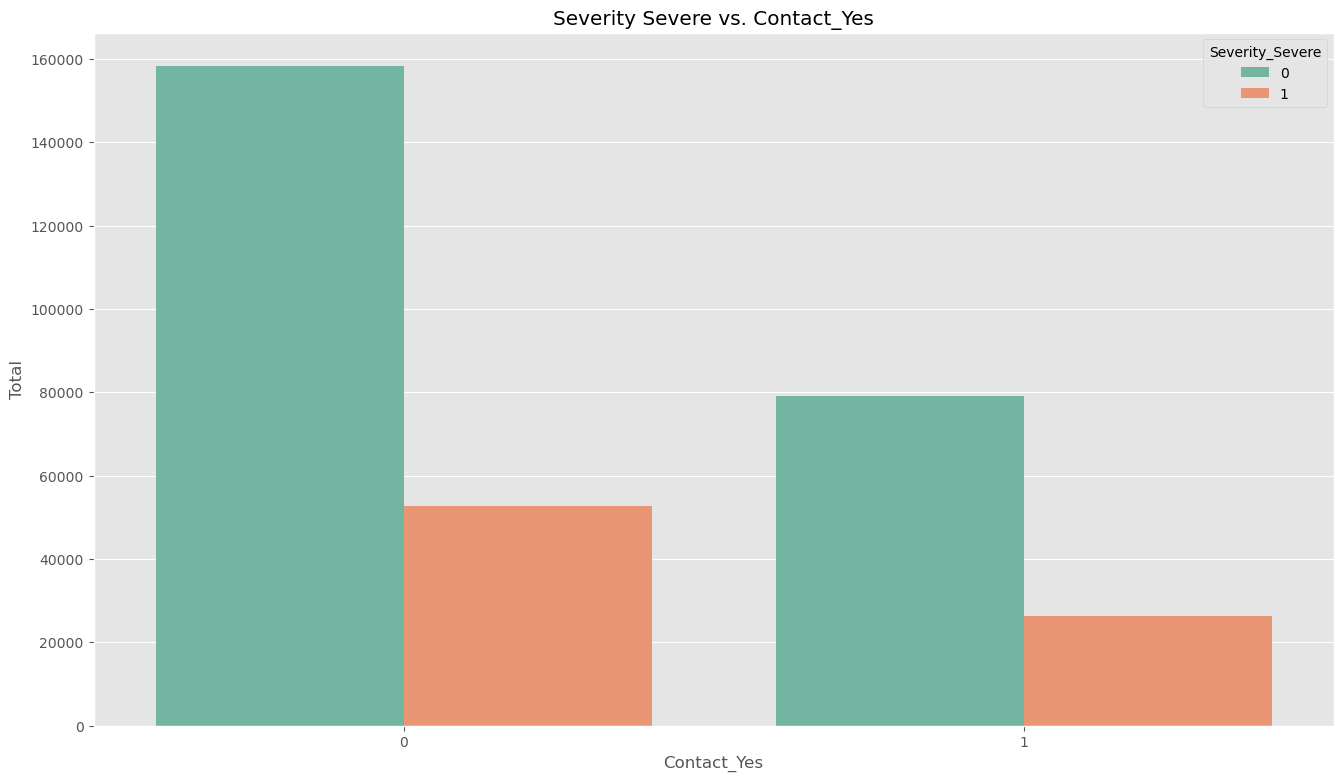

In [85]:
ax=sb.countplot(x='Contact_Yes', hue='Severity_Severe', palette='Set2', data=df)
ax.set(title='Severity Severe vs. Contact_Yes', xlabel='Contact_Yes', ylabel='Total')
plt.show()

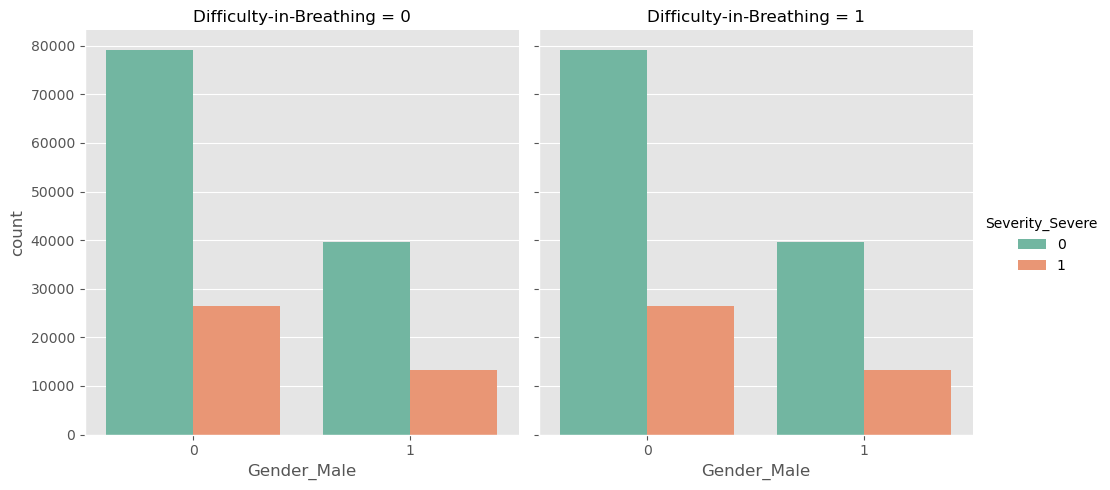

In [100]:
ax=sb.catplot(x='Gender_Male', hue='Severity_Severe', col='Difficulty-in-Breathing', palette='Set2', data=df, kind="count")
plt.show()

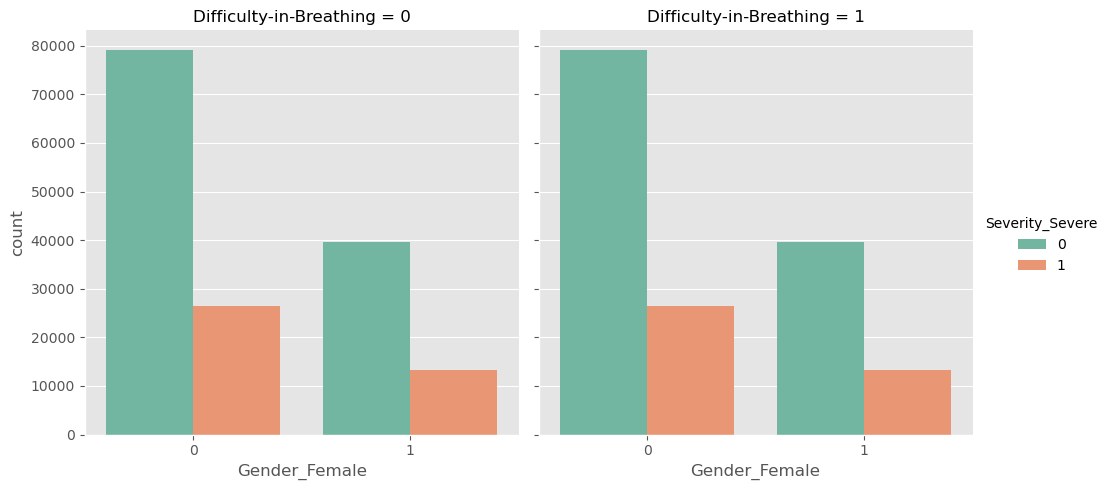

In [98]:
ax=sb.catplot(x='Gender_Female', hue='Severity_Severe', col='Difficulty-in-Breathing', palette='Set2', data=df, kind="count")
plt.show()

In [89]:
aux=df.groupby(['Age_60+', 'Gender_Male'])['Severity_Severe'].count()
aux

Age_60+  Gender_Male
0        0              168960
         1               84480
1        0               42240
         1               21120
Name: Severity_Severe, dtype: int64

In [90]:
aux=df.groupby(['Age_60+', 'Gender_Female'])['Severity_Severe'].count()
aux

Age_60+  Gender_Female
0        0                168960
         1                 84480
1        0                 42240
         1                 21120
Name: Severity_Severe, dtype: int64